# Regression Trees and Model Optimization - Lab

## Introduction

In this final lab, we'll see how to apply regression analysis using CART trees for regression while making use of some hyperparameter tuning to improve our model. For a comparison of predictive capabilities and computational cost, we'll work the "Boston Housing" dataset. This will allow us to compare different regression approaches in terms of their accuracy and cost involved.

## Objectives
You will be able to:
- Apply predictive regression analysis with CART trees
- Get the data ready for modeling
- Tune the key hyper parameters based a various models developed during training 
- Study the impact of tree pruning on the quality of predictions

## Boston Housing Dataset - Again ! 

The dataset is available in the repo as `boston.csv`. 

- Load the Dataset and print its head and dimensions

In [1]:
# Your code here 
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

/opt/conda/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/opt/conda/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


## Identify Features and Target Data
In this lab, we shall use three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. You'll find a brief description of each predictor below:

#### Features
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

#### Target
- `MEDV`',the median value of the home.


- Create dataframes for features and target as shown above. 
- Inspect the contents for validity 

In [2]:
data = pd.read_csv('boston.csv')
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
# Your code here 
features = data[['rm','lstat','ptratio']]
target = data.medv
target.shape, features.rm.shape

((506,), (506,))

## Inspect Correlations 

- Use scatter plots to show the correlation between chosen features and target variable
- Comment on each scatter plot 

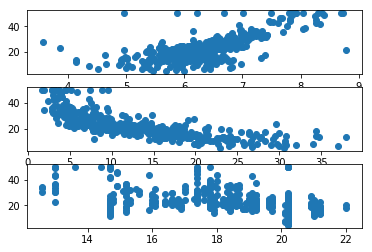

In [11]:
# Your code here 
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(3, 1)
axes[0].scatter(features.rm, target)
axes[1].scatter(features.lstat,target)
axes[2].scatter(features.ptratio,target)
plt.show()

## Create Evaluation Metrics

- Create a function `performance(true, predicted)` to calculate and return the r-squared score and MSE for two equal sized arrays showing true and predicted values
- TEst the function with given data 

In [13]:
# Evaluation Metrics
# Import metrics

def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    
    # Your code here 
    return r2_score(y_true,y_predict),mean_squared_error(y_true,y_predict)
    
    
    pass

# Calculate the performance - TEST
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

# [0.9228556485355649, 0.4719999999999998]

(0.9228556485355649, 0.4719999999999998)

## Supervised Training 
- For supervised learning, split the `features` and `target` datasets into training/test data (80/20). 
- For reproducibility, use `random_state=42`

In [16]:
# Your code here 
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state = 42)

## Grow a Vanilla Regression Tree

- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above.
- Use `random_state=45` for tree instance
- Record your observations

In [17]:
# Your code here 
model1 = DecisionTreeRegressor()
model1.fit(X_train,y_train)
performance(y_test,model1.predict(X_test))

# (0.4712438851035674, 38.7756862745098)  - R2, MSE

(0.6088112230830922, 28.68735294117647)

## Hyperparameter Tuning 

- Find the best tree depth for a depth range: 1-30
- Run the regressor repeatedly in a for loop for each depth value. 
- Use `random_state=45` for reproducibility
- Calculate MSE and r-squared for each run 
- Plot both performance measures, for all runs.
- Comment on the output 

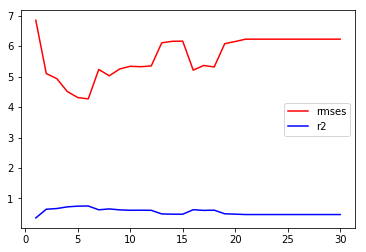

6

In [22]:
# Your code here 
depths = np.arange(1,31,1)
rmses =[]
rs =[]
for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=45)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    rmses.append(np.sqrt(mean_squared_error(y_test,preds)))
    rs.append(r2_score(y_test,preds))

plt.plot(depths,rmses, color = 'red', label = 'rmses')   
plt.plot(depths, rs, color = 'blue', label = 'r2')
plt.legend()
plt.show()
ind = rmses.index(min(rmses))
depths[ind]

## More Hyperparameter Tuning 

- Repeat the above process for `min_samples_split` parameter

- Use a a range of values from 2-10 for this parameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above

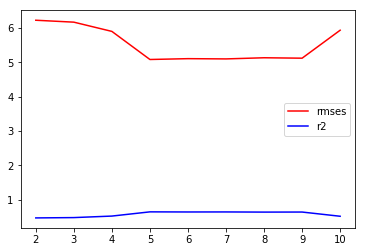

5

In [24]:
# Your code here 
min_sample_splits = np.arange(2,11,1)
rmses =[]
rs =[]
for s in min_sample_splits:
    model = DecisionTreeRegressor(min_samples_split=s, random_state=45)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    rmses.append(np.sqrt(mean_squared_error(y_test,preds)))
    rs.append(r2_score(y_test,preds))

plt.plot(min_sample_splits,rmses, color = 'red', label = 'rmses')   
plt.plot(min_sample_splits, rs, color = 'blue', label = 'r2')
plt.legend()
plt.show()
ind = rmses.index(min(rmses))
min_sample_splits[ind]

# Run the "Optimized" Model 

- Use the best values for max_depth and min_samples_split found in previous runs and run an optimized model with these values. 
- Calculate the performance and comment on the output 

In [26]:
# Your code here 
best = DecisionTreeRegressor(max_depth=6,min_samples_split=5,random_state=45)
best.fit(X_train,y_train)
preds = best.predict(X_te)

## Level Up - Optional 

- How about bringing in some more features from the original dataset which may be good predictors?
- Also , try tuning more hyperparameters like max-features to find the optimal version of the model.

## Summary 

In this lab, we looked at applying a decision tree based regression analysis on the Boston Housing Dataset. We saw how to train various models to find the optimal values for pruning and limiting the growth of the trees. We also looked at how to extract some rules from visualizing trees , that might be used for decision making later.